# Identifying Pneumonia with Deep Learning
***
Author: Andre Layton
***

# Overview
.......

# Business Problem
........

***
<img src="https://media.licdn.com/dms/image/D4D12AQEqfniioS4KVQ/article-cover_image-shrink_720_1280/0/1677311223167?e=2147483647&v=beta&t=loMCjRjjqYyKI72mjdbVk5_XbxRdzonIKz0qRn-BcXo" style="height:500px; width:875px" />

## Data Understanding

In [1]:
# Import all the necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras import regularizers
import os, shutil, random

# Create a seed for reproducibility
seed = 24

In [2]:
train_pneu = 'data/chest_xray/train/PNEUMONIA'
train_normal = 'data/chest_xray/train/NORMAL'

val_pneu = 'data/chest_xray/val/PNEUMONIA'
val_normal = 'data/chest_xray/val/NORMAL'

test_pneu = 'data/chest_xray/test/PNEUMONIA'
test_normal = 'data/chest_xray/test/NORMAL'

In [3]:
print('There are', len(os.listdir(train_pneu)), 'PNEUMONIA X-rays in the training set')
print('There are', len(os.listdir(train_normal)), 'NORMAL X-rays in the train set')
print('\n')
print('There are', len(os.listdir(val_pneu)), 'PNEUMONIA X-rays in the validation set')
print('There are', len(os.listdir(val_normal)), 'NORMAL X-rays in the validation set')
print('\n')
print('There are', len(os.listdir(test_pneu)), 'PNEUMONIA X-rays in the test set')
print('There are', len(os.listdir(test_normal)), 'NORMAL X-rays in the test set')

There are 3875 PNEUMONIA X-rays in the training set
There are 1341 NORMAL X-rays in the train set


There are 8 PNEUMONIA X-rays in the validation set
There are 8 NORMAL X-rays in the validation set


There are 390 PNEUMONIA X-rays in the test set
There are 234 NORMAL X-rays in the test set


In [32]:
source_folder = test_pneu
destination_folder = val_pneu
files_to_move = os.listdir(source_folder)

for file in random.sample(files_to_move, 50):
    shutil.move(os.path.join(source_folder, file), destination_folder)
    print('There are', len(os.listdir(destination_folder)), 'PNEUMONIA X-rays in the validation set')

There are 341 PNEUMONIA X-rays in the validation set
There are 342 PNEUMONIA X-rays in the validation set
There are 343 PNEUMONIA X-rays in the validation set
There are 344 PNEUMONIA X-rays in the validation set
There are 345 PNEUMONIA X-rays in the validation set
There are 346 PNEUMONIA X-rays in the validation set
There are 347 PNEUMONIA X-rays in the validation set
There are 348 PNEUMONIA X-rays in the validation set
There are 349 PNEUMONIA X-rays in the validation set
There are 350 PNEUMONIA X-rays in the validation set
There are 351 PNEUMONIA X-rays in the validation set
There are 352 PNEUMONIA X-rays in the validation set
There are 353 PNEUMONIA X-rays in the validation set
There are 354 PNEUMONIA X-rays in the validation set
There are 355 PNEUMONIA X-rays in the validation set
There are 356 PNEUMONIA X-rays in the validation set
There are 357 PNEUMONIA X-rays in the validation set
There are 358 PNEUMONIA X-rays in the validation set
There are 359 PNEUMONIA X-rays in the validati

In [31]:
source_folder2 = test_normal
destination_folder2 = val_normal
files_to_move2 = os.listdir(source_folder2)

for file in random.sample(files_to_move2, 50):
    shutil.move(os.path.join(source_folder2, file), destination_folder2)
    print('There are', len(os.listdir(destination_folder2)), 'NORMAL X-rays in the validation set')

There are 185 NORMAL X-rays in the validation set
There are 186 NORMAL X-rays in the validation set
There are 187 NORMAL X-rays in the validation set
There are 188 NORMAL X-rays in the validation set
There are 189 NORMAL X-rays in the validation set
There are 190 NORMAL X-rays in the validation set
There are 191 NORMAL X-rays in the validation set
There are 192 NORMAL X-rays in the validation set
There are 193 NORMAL X-rays in the validation set
There are 194 NORMAL X-rays in the validation set
There are 195 NORMAL X-rays in the validation set
There are 196 NORMAL X-rays in the validation set
There are 197 NORMAL X-rays in the validation set
There are 198 NORMAL X-rays in the validation set
There are 199 NORMAL X-rays in the validation set
There are 200 NORMAL X-rays in the validation set
There are 201 NORMAL X-rays in the validation set
There are 202 NORMAL X-rays in the validation set
There are 203 NORMAL X-rays in the validation set
There are 204 NORMAL X-rays in the validation set


In [6]:
# Create directory path objects
train_data_dir = 'data/chest_xray/train'
test_data_dir = 'data/chest_xray/test'
validation_dir = 'data/chest_xray/val'

# Gather and reshape the data in each directory object
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64, 64), batch_size=5216,
                                                           seed=seed)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(64, 64), batch_size=524,
                                                           seed=seed)
val_generator = ImageDataGenerator().flow_from_directory(validation_dir, target_size=(64, 64), batch_size=116,
                                                           seed=seed)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 524 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


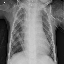

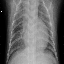

In [7]:
# Preview some images
display(array_to_img(train_images[17]))
array_to_img(train_images[4200])

In [8]:
# Preview the shape of the data
print("Train Data Shape:")
print(np.shape(train_images))
print(np.shape(train_labels))
print("\nTest Data Shape:")
print(np.shape(test_images))
print(np.shape(test_labels))
print("\nValidation Data Shape:")
print(np.shape(val_images))
print(np.shape(val_labels))

Train Data Shape:
(5216, 64, 64, 3)
(5216, 2)

Test Data Shape:
(524, 64, 64, 3)
(524, 2)

Validation Data Shape:
(116, 64, 64, 3)
(116, 2)


In [ ]:
# Reshape the train, test, and validation images 
#train_img_unrow = train_images.reshape(5216, -1).T
#test_img_unrow = test_images.reshape(624, -1).T
#val_img_unrow = val_images.reshape(16, -1).T

# Preview the shape of each newly-formed objects
#print(np.shape(train_img_unrow))
#print(np.shape(test_img_unrow))
#print(np.shape(val_img_unrow))

In [9]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
# Reshape the label datasets, and select the 'PNEUMONIA' column
y_train_labels = train_labels.T[[1]]
y_test_labels = test_labels.T[[1]]
y_val_labels = val_labels.T[[1]]

# Check the shape of the transformed labels 
print(np.shape(y_train_labels))
print(np.shape(y_test_labels))
print(np.shape(y_val_labels))

(1, 5216)
(1, 524)
(1, 116)


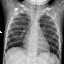

[0.]


In [11]:
# Confirm if the image matches the corresponding label
display(array_to_img(train_images[1400]))
print(y_train_labels[:, 1400])

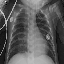

[1.]


In [12]:
# Confirm if the image matches the corresponding label
display(array_to_img(train_images[14]))
print(y_train_labels[:, 14])

## Modeling

### Baseline Model:

In [13]:
# Reshape the train, test, and validation images for modeling
X_train = train_images.reshape(5216, -1)
X_test = test_images.reshape(524, -1)
X_val = val_images.reshape(116, -1)

# Preview the shape of each newly-formed objects
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(X_val))

(5216, 12288)
(524, 12288)
(116, 12288)


In [14]:
# Standardize the datasets
X_train_final = X_train/255
X_test_final = X_test/255
X_val_final = X_val/255

In [15]:
# Reshape the label datasets for modeling
y_train = np.reshape(train_labels[:, 0], (5216, 1))
y_test = np.reshape(test_labels[:, 0], (524, 1))
y_val = np.reshape(val_labels[:, 0], (116, 1))

# Check the shape of the transformed labels 
print(np.shape(y_train))
print(np.shape(y_test))
print(np.shape(y_val))

(5216, 1)
(524, 1)
(116, 1)


In [16]:
baseline_model = Sequential()
baseline_model.add(Dense(42, activation='relu', input_shape=(12288, )))
baseline_model.add(Dense(1, activation='sigmoid'))

In [17]:
baseline_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])

In [18]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                516138    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 43        
Total params: 516,181
Trainable params: 516,181
Non-trainable params: 0
_________________________________________________________________


In [23]:
baseline = baseline_model.fit(X_train_final, y_train, epochs=75, batch_size=320,
                                      validation_data=(X_val_final, y_val))

Epoch 1/75
17/17 [==============================] - 0s 17ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8277 - val_acc: 0.5000
Epoch 2/75
17/17 [==============================] - 0s 15ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8278 - val_acc: 0.5000
Epoch 3/75
17/17 [==============================] - 0s 14ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8277 - val_acc: 0.5000
Epoch 4/75
17/17 [==============================] - 0s 14ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8278 - val_acc: 0.5000
Epoch 5/75
17/17 [==============================] - 0s 20ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8276 - val_acc: 0.5000
Epoch 6/75
17/17 [==============================] - 0s 27ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8277 - val_acc: 0.5000
Epoch 7/75
17/17 [==============================] - 0s 28ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8280 - val_acc: 0.5000
Epoch 8/75
17/17 [==============================] - 0s 28ms/step - loss: 0.5700 - a

17/17 [==============================] - 1s 32ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8279 - val_acc: 0.5000
Epoch 64/75
17/17 [==============================] - 0s 29ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8275 - val_acc: 0.5000
Epoch 65/75
17/17 [==============================] - 1s 33ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8272 - val_acc: 0.5000
Epoch 66/75
17/17 [==============================] - 1s 32ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8273 - val_acc: 0.5000
Epoch 67/75
17/17 [==============================] - 0s 29ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8277 - val_acc: 0.5000
Epoch 68/75
17/17 [==============================] - 0s 29ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8276 - val_acc: 0.5000
Epoch 69/75
17/17 [==============================] - 0s 27ms/step - loss: 0.5700 - acc: 0.7429 - val_loss: 0.8271 - val_acc: 0.5000
Epoch 70/75
17/17 [==============================] - 0s 28ms/step - loss: 0.5700 - acc: 

In [24]:
print(baseline.history['acc'][-1])
baseline.history['val_acc'][-1]

0.7429064512252808


0.5

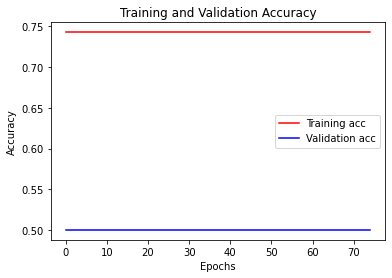

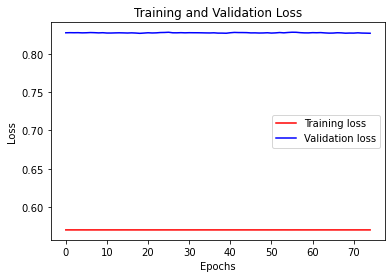

In [25]:
def visualize_training_results(results):
    acc = results.history['acc']
    val_acc = results.history['val_acc']
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(acc))
    
    plt.figure()
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

visualize_training_results(baseline)

### Cross-Validating the Baseline Model:

In [26]:
def build_model():
    model = Sequential()
    model.add(Dense(42, activation='relu', input_shape=(12288, )))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', 
                  optimizer='RMSprop', 
                  metrics=['acc'])
    return model

In [27]:
keras_model = scikit_learn.KerasClassifier(build_model,
                                          epochs=75,
                                          batch_size=320,
                                          verbose=2)
kfold = KFold(shuffle=True, random_state=seed)
validation_scores = cross_val_score(keras_model, X_train_final, y_train, cv=kfold)

Epoch 1/75
14/14 - 0s - loss: 4.5146 - acc: 0.6246
Epoch 2/75
14/14 - 0s - loss: 1.5985 - acc: 0.7045
Epoch 3/75
14/14 - 0s - loss: 1.3654 - acc: 0.7157
Epoch 4/75
14/14 - 0s - loss: 1.2837 - acc: 0.7282
Epoch 5/75
14/14 - 0s - loss: 0.8874 - acc: 0.7749
Epoch 6/75
14/14 - 0s - loss: 1.0528 - acc: 0.7625
Epoch 7/75
14/14 - 0s - loss: 0.7501 - acc: 0.8042
Epoch 8/75
14/14 - 0s - loss: 0.9384 - acc: 0.7536
Epoch 9/75
14/14 - 0s - loss: 0.5738 - acc: 0.8224
Epoch 10/75
14/14 - 0s - loss: 0.7005 - acc: 0.8090
Epoch 11/75
14/14 - 0s - loss: 0.6145 - acc: 0.8039
Epoch 12/75
14/14 - 0s - loss: 0.5597 - acc: 0.8128
Epoch 13/75
14/14 - 0s - loss: 0.4391 - acc: 0.8411
Epoch 14/75
14/14 - 0s - loss: 0.4571 - acc: 0.8600
Epoch 15/75
14/14 - 0s - loss: 0.5152 - acc: 0.8365
Epoch 16/75
14/14 - 0s - loss: 0.5451 - acc: 0.8157
Epoch 17/75
14/14 - 0s - loss: 0.3298 - acc: 0.8737
Epoch 18/75
14/14 - 0s - loss: 0.4479 - acc: 0.8449
Epoch 19/75
14/14 - 0s - loss: 0.3268 - acc: 0.8802
Epoch 20/75
14/14 - 0

Epoch 8/75
14/14 - 0s - loss: 0.4294 - acc: 0.7412
Epoch 9/75
14/14 - 0s - loss: 0.4091 - acc: 0.7412
Epoch 10/75
14/14 - 0s - loss: 0.4058 - acc: 0.7412
Epoch 11/75
14/14 - 0s - loss: 0.3832 - acc: 0.7412
Epoch 12/75
14/14 - 0s - loss: 0.4129 - acc: 0.7412
Epoch 13/75
14/14 - 0s - loss: 0.3610 - acc: 0.7412
Epoch 14/75
14/14 - 0s - loss: 0.3585 - acc: 0.7412
Epoch 15/75
14/14 - 0s - loss: 0.3654 - acc: 0.7412
Epoch 16/75
14/14 - 0s - loss: 0.3297 - acc: 0.8639
Epoch 17/75
14/14 - 0s - loss: 0.3362 - acc: 0.8838
Epoch 18/75
14/14 - 0s - loss: 0.3397 - acc: 0.8787
Epoch 19/75
14/14 - 0s - loss: 0.3241 - acc: 0.8876
Epoch 20/75
14/14 - 0s - loss: 0.3132 - acc: 0.9022
Epoch 21/75
14/14 - 0s - loss: 0.3408 - acc: 0.8713
Epoch 22/75
14/14 - 0s - loss: 0.3049 - acc: 0.9015
Epoch 23/75
14/14 - 0s - loss: 0.3325 - acc: 0.8881
Epoch 24/75
14/14 - 0s - loss: 0.2974 - acc: 0.9087
Epoch 25/75
14/14 - 0s - loss: 0.3089 - acc: 0.8998
Epoch 26/75
14/14 - 0s - loss: 0.2942 - acc: 0.9085
Epoch 27/75
14

Epoch 15/75
14/14 - 0s - loss: 0.6568 - acc: 0.8529
Epoch 16/75
14/14 - 0s - loss: 0.6413 - acc: 0.8572
Epoch 17/75
14/14 - 0s - loss: 0.7469 - acc: 0.8682
Epoch 18/75
14/14 - 0s - loss: 0.8878 - acc: 0.8162
Epoch 19/75
14/14 - 0s - loss: 0.7029 - acc: 0.8581
Epoch 20/75
14/14 - 0s - loss: 0.6317 - acc: 0.8536
Epoch 21/75
14/14 - 0s - loss: 0.7727 - acc: 0.8272
Epoch 22/75
14/14 - 0s - loss: 0.6623 - acc: 0.8380
Epoch 23/75
14/14 - 0s - loss: 0.1763 - acc: 0.9365
Epoch 24/75
14/14 - 0s - loss: 0.9013 - acc: 0.8476
Epoch 25/75
14/14 - 0s - loss: 0.6081 - acc: 0.8452
Epoch 26/75
14/14 - 0s - loss: 0.5737 - acc: 0.8900
Epoch 27/75
14/14 - 0s - loss: 0.6349 - acc: 0.8763
Epoch 28/75
14/14 - 0s - loss: 0.3893 - acc: 0.8797
Epoch 29/75
14/14 - 0s - loss: 0.5611 - acc: 0.8574
Epoch 30/75
14/14 - 0s - loss: 0.6327 - acc: 0.8344
Epoch 31/75
14/14 - 0s - loss: 0.5062 - acc: 0.8840
Epoch 32/75
14/14 - 0s - loss: 0.4385 - acc: 0.8804
Epoch 33/75
14/14 - 0s - loss: 0.4368 - acc: 0.8809
Epoch 34/75


In [28]:
validation_scores.mean()

0.9336632132530213

### Tuning Baseline Model:

In [29]:
regularized_model = Sequential()
regularized_model.add(Dense(42, activation='relu', 
                            kernel_regularizer=regularizers.l2(0.005), input_shape=(12288, )))
regularized_model.add(Dense(1, activation = 'sigmoid'))
regularized_model.compile(loss='binary_crossentropy', 
                  optimizer='RMSprop', 
                  metrics=['acc'])
results = regularized_model.fit(X_train_final, y_train, epochs=50, batch_size=100,
                                      validation_data=(X_val_final, y_val))

Epoch 1/50
53/53 [==============================] - 1s 10ms/step - loss: 1.2657 - acc: 0.7071 - val_loss: 0.9643 - val_acc: 0.5000
Epoch 2/50
53/53 [==============================] - 0s 8ms/step - loss: 0.6524 - acc: 0.7584 - val_loss: 3.3391 - val_acc: 0.5000
Epoch 3/50
53/53 [==============================] - 0s 8ms/step - loss: 1.4717 - acc: 0.7222 - val_loss: 3.8385 - val_acc: 0.5000
Epoch 4/50
53/53 [==============================] - 0s 8ms/step - loss: 1.1621 - acc: 0.7588 - val_loss: 0.4242 - val_acc: 0.8276
Epoch 5/50
53/53 [==============================] - 0s 8ms/step - loss: 1.0881 - acc: 0.7851 - val_loss: 0.5655 - val_acc: 0.8017
Epoch 6/50
53/53 [==============================] - 0s 9ms/step - loss: 1.0413 - acc: 0.8259 - val_loss: 0.4812 - val_acc: 0.7931
Epoch 7/50
53/53 [==============================] - 1s 16ms/step - loss: 0.7464 - acc: 0.8294 - val_loss: 3.1194 - val_acc: 0.5172
Epoch 8/50
53/53 [==============================] - 1s 16ms/step - loss: 0.7567 - acc: 0

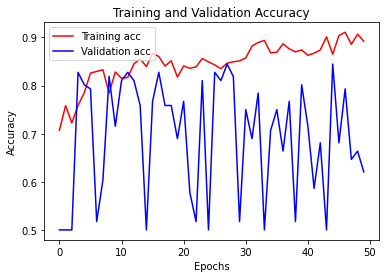

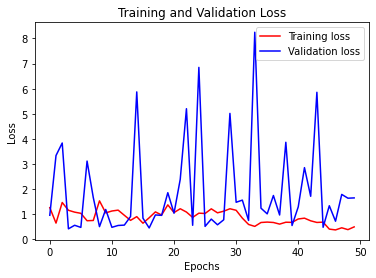

In [30]:
visualize_training_results(results)

### Convolutional Network:

In [ ]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
CNNmodel.add(MaxPooling2D((2, 2)))
